#Reading Samples

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


we have 3 different data bases with different labeling, the first objective is to integrate them all into three dataframe called, Walden, Voiced, and SVD.

In [ ]:
import os
from scipy.io import wavfile
import pandas as pd
import numpy as np
import seaborn as sns
import math
import re


##walden database

In [ ]:
path = r"/content/drive/MyDrive/SONAR/Database/PVQD (Walden)/PVQD only [a]/Sustained [a] from PVQD (150 with new codes)"
path_labels=r"/content/drive/MyDrive/SONAR/Database/PVQD (Walden)/PVQD original/Labels and ratings (original)/grbas_grade_only.xlsx"

In [ ]:
file_names=os.listdir(path+"/..")

In [ ]:
file_names

In [ ]:
n=[i for i in file_names if i.endswith(".xlsx")][0]

In [ ]:
n

In [ ]:
data=pd.read_excel(os.path.join(path+"/..",n),header=1)
data_labels=pd.read_excel(path_labels)

In [ ]:
healthy=data_labels.loc[data_labels["Category"].astype("str")=="Normal","File"].values

In [ ]:
healthy

In [ ]:
data.index

In [ ]:
data[1:20]

In [ ]:
data=pd.DataFrame(data.values,index=data["Participant ID"].values)

In [ ]:
len(data.index)

In [ ]:
data.columns

In [ ]:
import math

In [ ]:
data["Diagnosis"].astype("str")[17]

In [ ]:
nan=data["Diagnosis"].astype("str")!="nan"
N=data["Diagnosis"].astype("str")!="N"
Y=data["Diagnosis"].astype("str")!="Y"

In [ ]:
pat=nan*N*Y

In [ ]:
pathologics=data.loc[pat,["Participant ID","Diagnosis"]]

In [ ]:
pathologics

In [ ]:
No_dysphonia=np.invert(N)

In [ ]:
dysphonia=np.invert(Y)

In [ ]:
dysphonia

In [ ]:
No_dysphonia

In [ ]:
no_dysphonia=data.loc[No_dysphonia,["Participant ID","Diagnosis"]]

In [ ]:
no_dysphonia

In [ ]:
dysphonia=data.loc[dysphonia,["Participant ID","Diagnosis"]]

In [ ]:
dysphonia

In [ ]:
healthy

In [ ]:
set(data.Diagnosis.values)

##SVD

### labels

In [ ]:
path=r"/content/drive/MyDrive/SONAR/Database/SVD (Saarbrücken) samples"

In [ ]:
folder_conts=os.listdir(path)

In [ ]:
conts=[ i for i in folder_conts if not(i.endswith(".zip"))]

In [ ]:
conts

['Saarbrücken SVD healthy',
 'Saarbrücken SVD pathological',
 'Saarbrücken SVD key.xlsx']

In [ ]:
healthy_IDs=os.listdir(os.path.join(path,conts[0]))

In [ ]:
pathological_IDs=os.listdir(os.path.join(path,conts[1]))

In [ ]:
data=pd.read_excel(os.path.join(path,conts[2]))

In [ ]:
data

,E,ID,T,D,S,G,A,Pathologies,Remarks w.r.t. diagnosis,B
0,NaN,1,n,1997-11-20,1,w,20,NaN,NaN,NaN
1,NaN,1862,p,2000-11-27,1,w,23,Funktionelle Dysphonie,NaN,NaN
2,NaN,2,n,1997-11-20,2,w,22,NaN,NaN,NaN
3,NaN,3,n,1997-11-20,3,w,23,NaN,NaN,NaN
4,NaN,4,n,1997-11-20,4,m,22,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2220,NaN,2610,p,2004-06-16,2736,w,73,Laryngitis,Chronische Laryngitis gastrica?,NaN
2221,NaN,2611,p,2004-06-16,2737,m,18,Balbuties,Nicht ganz abgeschlossene Mutatio,NaN
2222,NaN,2622,n,1998-02-23,2739,m,44,NaN,NaN,NaN
2223,NaN,2642,n,1998-02-24,2740,m,39,NaN,NaN,NaN


In [ ]:
col=[]
n=[]
for i in data:

  if len(data[data[i].astype("str")=="nan"]) == len(data):
    continue
  col.append(i)
  n.append(data[i].values)

In [ ]:
n=np.column_stack(n)

In [ ]:
data=pd.DataFrame(n,index=data.index,columns=col)

In [ ]:
data=pd.DataFrame(data.loc[:,["ID","Pathologies","Remarks w.r.t. diagnosis"]].values,columns=["ID","Pathologies","Remarks"])

In [ ]:
data=data.loc[:,["ID","Pathologies"]]

In [ ]:
data

,ID,Pathologies
0,1,NaN
1,1862,Funktionelle Dysphonie
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
2220,2610,Laryngitis
2221,2611,Balbuties
2222,2622,NaN
2223,2642,NaN


In [ ]:
len(data),len(healthy_IDs),len(pathological_IDs),len(healthy_IDs)+len(pathological_IDs)

(2225, 687, 1354, 2041)

In [ ]:
data[data["Pathologies"].astype("str") == "nan"]

,ID,Pathologies
0,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
...,...,...
2161,2532,NaN
2183,2561,NaN
2222,2622,NaN
2223,2642,NaN


In [ ]:
data[data["Pathologies"].astype("str") != "nan"]

,ID,Pathologies
1,1862,Funktionelle Dysphonie
52,1645,Funktionelle Dysphonie
69,127,"Dysodie, Hyperfunktionelle Dysphonie"
70,567,Dysodie
77,148,Vox senilis
...,...,...
2217,2607,Dysphonie
2218,2608,Dysphonie
2219,2609,Balbuties
2220,2610,Laryngitis


In [ ]:
data[data["Pathologies"].astype("str").apply(lambda x: bool(len(re.split(r",",x))!=1))]

,ID,Pathologies
69,127,"Dysodie, Hyperfunktionelle Dysphonie"
96,1335,"Hyperfunktionelle Dysphonie, Psychogene Dysphonie"
134,495,"Dysphonie, Reinke �dem"
860,106,"Fibrom, Hyperfunktionelle Dysphonie"
867,2120,"Dysphonie, Laryngitis"
...,...,...
2193,2572,"Hyperfunktionelle Dysphonie, Stimmlippenpolyp"
2196,2577,"Hyperfunktionelle Dysphonie, Psychogene Dysphonie"
2206,2588,"Laryngitis, Reinke �dem"
2209,2591,"Hyperfunktionelle Dysphonie, Reinke �dem"


In [ ]:
#data[data["Pathologies"].astype("str").apply(lambda x: bool(len(re.split(r",",x))!=1))].to_csv("/content/double.csv")

In [ ]:
#t=[int(i[:-8]) for i in pathological_IDs ]

In [ ]:
pattern=re.compile(r"(\d+)(-.+)")
healthy_data=data[[bool(i) for i in data["ID"].astype("str").apply(lambda x: [i  for i in healthy_IDs if pattern.sub(r"\1",i)==x] )]]

In [ ]:
healthy_data

,ID,Pathologies
0,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
...,...,...
2104,2462,NaN
2117,2478,NaN
2127,2495,NaN
2161,2532,NaN


In [ ]:
pattern=re.compile(r"(\d+)(-.+)")
pathological_data=data[data["ID"].astype("str").apply(lambda x: x in [pattern.sub(r"\1",i) for i in pathological_IDs] )]

In [ ]:
len(pathological_data),len(healthy_data)

(1354, 687)

In [ ]:
len(pathological_IDs),len(healthy_IDs)

(1354, 687)

In [ ]:
pathological_data

,ID,Pathologies
1,1862,Funktionelle Dysphonie
52,1645,Funktionelle Dysphonie
69,127,"Dysodie, Hyperfunktionelle Dysphonie"
70,567,Dysodie
77,148,Vox senilis
...,...,...
2216,2606,Hypofunktionelle Dysphonie
2217,2607,Dysphonie
2218,2608,Dysphonie
2219,2609,Balbuties


In [ ]:
unidentified=set(data["ID"])-(set(pathological_data["ID"]).union(set(healthy_data["ID"])))
data[[i in unidentified for i in data["ID"]]]

,ID,Pathologies
136,2672,NaN
137,2612,NaN
138,2613,NaN
139,2614,NaN
140,2615,NaN
...,...,...
988,713,Rhinophonie aperta
2221,2611,Balbuties
2222,2622,NaN
2223,2642,NaN


In [ ]:
data.loc[data["Pathologies"].astype("str")!="nan","Pathologies"].value_counts().head(30)

Pathologies
Rekurrensparese                                      197
Hyperfunktionelle Dysphonie                          143
Laryngitis                                            82
Funktionelle Dysphonie                                75
Dysphonie                                             70
Spasmodische Dysphonie                                62
Psychogene Dysphonie                                  51
Chordektomie                                          40
Reinke �dem                                           34
Kontaktpachydermie                                    32
Frontolaterale Teilresektion                          29
Dysodie                                               28
Stimmlippenpolyp                                      27
Vox senilis                                           23
Laryngitis, Leukoplakie                               21
Stimmlippenkarzinom                                   20
Hyperfunktionelle Dysphonie, Psychogene Dysphonie     18
Balbuties          

##new LABELS

In [ ]:
path=r"/content/drive/MyDrive/SONAR/Database/Copy of Labels.xlsx"

In [ ]:
new_labels=pd.read_excel(path)

In [ ]:
new_labels

,Database,Label,Original Label,"Payten, C. L., Chiapello, G., Weir, K. A., & Madill, C. J. (2022). Frameworks, terminology and definitions used for the classification of voice disorders: a scoping review. Journal of Voice.",Unnamed: 4,Unnamed: 5,Classification Following the VOice ICar fEDerico II criteria,Classification Groups,Classification Subgroups,More Specific Classification Subgroups,Delete label?,Final classification
0,VOice ICar fEDerico II (VOICED),Vocal fold paralysis,hyperkinetic dysphonia (Vocal fold paralysis),OVD (Organic Voice Disorder),OVD Neuro-Muscular,Peripheral nervous system,hyperkinetic dysphonia,Neurogenic Voice Disorder,Paralysis,NaN,NaN,Adduction deficit
1,VOice ICar fEDerico II (VOICED),Vocal fold paralysis,hypokinetic dysphonia (Vocal fold paralysis),OVD (Organic Voice Disorder),OVD Neuro-Muscular,Peripheral nervous system,hypokinetic dysphonia,Neurogenic Voice Disorder,Paralysis,NaN,NaN,Adduction deficit
2,PVQD (Walden),Unilateral VF paralysis,Unilateral VF paralysis,OVD (Organic Voice Disorder),OVD Neuro-Muscular,Peripheral nervous system,hypokinetic dysphonia,Neurogenic Voice Disorder,Paralysis,NaN,NaN,Adduction deficit
3,SVD (Saarbrücke Voice Database),Recurrent Laryngeal Nerve Paralysis,Rekurrensparese (Recurrent Laryngeal Nerve Par...,OVD (Organic Voice Disorder),OVD Neuro-Muscular,Peripheral nervous system,hypokinetic dysphonia,Neurogenic Voice Disorder,Paralysis,NaN,NaN,Adduction deficit
4,PVQD (Walden),VF Paresis,VF Paresis,OVD (Organic Voice Disorder),OVD Neuro-Muscular,Peripheral nervous system,hypokinetic dysphonia,Neurogenic Voice Disorder,Paresis,NaN,NaN,Adduction deficit
...,...,...,...,...,...,...,...,...,...,...,...,...
108,SVD (Saarbrücke Voice Database),Frontolateral Partial Resection,Frontolaterale Teilresektion (Frontolateral Pa...,OVD (Organic Voice Disorder),OVD Structural,Trauma,Unclassified,Structural Voice Disorder,Surgical condition,NaN,NaN,Vocal Fold Lesion
109,PVQD (Walden),Glottic Cancer,Glottic Cancer,OVD (Organic Voice Disorder),OVD Structural,Malignancy,Unclassified,Structural Voice Disorder,Cancer,NaN,NaN,Vocal Fold Lesion
110,SVD (Saarbrücke Voice Database),Carcinoma in Situ,Carcinoma in situ (Carcinoma in Situ),OVD (Organic Voice Disorder),OVD Structural,Malignancy,Unclassified,Structural Voice Disorder,Cancer,NaN,NaN,Vocal Fold Lesion
111,SVD (Saarbrücke Voice Database),Laryngeal Tumor,Kehlkopftumor (Laryngeal Tumor),OVD (Organic Voice Disorder),OVD Structural,Malignancy,Unclassified,Structural Voice Disorder,Cancer,NaN,NaN,Vocal Fold Lesion


### new labels SVD

In [ ]:
pattern=re.compile(r"SVD")
SVD_=[bool(pattern.search(i)) for i in new_labels["Database"]]

In [ ]:
new_labels=new_labels[SVD_]

In [ ]:
new_labels.columns

Index(['Database', 'Label', 'Original Label',
       'Payten, C. L., Chiapello, G., Weir, K. A., & Madill, C. J. (2022). Frameworks, terminology and definitions used for the classification of voice disorders: a scoping review. Journal of Voice.',
       'Unnamed: 4', 'Unnamed: 5',
       'Classification Following the VOice ICar fEDerico II criteria',
       'Classification Groups', 'Classification Subgroups',
       'More Specific Classification Subgroups', 'Delete label?',
       'Final classification'],
      dtype='object')

In [ ]:
hyp=new_labels.loc[:,['Original Label','Delete label?','Final classification']].astype("str")
hyp

,Original Label,Delete label?,Final classification
3,Rekurrensparese (Recurrent Laryngeal Nerve Par...,nan,Adduction deficit
9,Zentral-laryngale Bewegungsstörung (Central La...,nan,Adduction deficit
10,N. laryngeus superior Neuralgie (Neuralgia of ...,nan,Adduction deficit
11,Bulb�rparalyse (Bulbar Paralysis),nan,Adduction deficit
12,Internusschw�che (Internus Weakness),nan,Adduction deficit
...,...,...,...
107,Chordektomie (Chordecomy),nan,Vocal Fold Lesion
108,Frontolaterale Teilresektion (Frontolateral Pa...,nan,Vocal Fold Lesion
110,Carcinoma in situ (Carcinoma in Situ),nan,Vocal Fold Lesion
111,Kehlkopftumor (Laryngeal Tumor),nan,Vocal Fold Lesion


In [ ]:
hyp=hyp.loc[hyp["Delete label?"]!="Delete",["Original Label","Final classification"]]

In [ ]:
data

,ID,Pathologies
0,1,NaN
1,1862,Funktionelle Dysphonie
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
2220,2610,Laryngitis
2221,2611,Balbuties
2222,2622,NaN
2223,2642,NaN


In [ ]:
pathological_data

,ID,Pathologies
1,1862,Funktionelle Dysphonie
52,1645,Funktionelle Dysphonie
69,127,"Dysodie, Hyperfunktionelle Dysphonie"
70,567,Dysodie
77,148,Vox senilis
...,...,...
2216,2606,Hypofunktionelle Dysphonie
2217,2607,Dysphonie
2218,2608,Dysphonie
2219,2609,Balbuties


In [ ]:
new_labels=new_labels[["Original Label","Classification Groups"]]

In [ ]:
new_labels

,Original Label,Classification Groups
3,Rekurrensparese (Recurrent Laryngeal Nerve Par...,Neurogenic Voice Disorder
9,Zentral-laryngale Bewegungsstörung (Central La...,Neurogenic Voice Disorder
10,N. laryngeus superior Neuralgie (Neuralgia of ...,Neurogenic Voice Disorder
11,Bulb�rparalyse (Bulbar Paralysis),Neurogenic Voice Disorder
12,Internusschw�che (Internus Weakness),Neurogenic Voice Disorder
...,...,...
107,Chordektomie (Chordecomy),Structural Voice Disorder
108,Frontolaterale Teilresektion (Frontolateral Pa...,Structural Voice Disorder
110,Carcinoma in situ (Carcinoma in Situ),Structural Voice Disorder
111,Kehlkopftumor (Laryngeal Tumor),Structural Voice Disorder


In [ ]:
pathological_data1=pathological_data[pathological_data["Pathologies"].apply(lambda x: bool(len(re.split(r",",x))==1))]

In [ ]:
pathological_data1

,ID,Pathologies
1,1862,Funktionelle Dysphonie
52,1645,Funktionelle Dysphonie
70,567,Dysodie
77,148,Vox senilis
79,929,Rekurrensparese
...,...,...
2216,2606,Hypofunktionelle Dysphonie
2217,2607,Dysphonie
2218,2608,Dysphonie
2219,2609,Balbuties


In [ ]:
new_labels["Original Label"]=new_labels["Original Label"].apply(lambda x: re.split(r"\(",x)[0])

In [ ]:
hyp["Original Label"]=hyp["Original Label"].apply(lambda x: re.split(r"\(",x)[0])
hyp

,Original Label,Final classification
3,Rekurrensparese,Adduction deficit
9,Zentral-laryngale Bewegungsstörung,Adduction deficit
10,N. laryngeus superior Neuralgie,Adduction deficit
11,Bulb�rparalyse,Adduction deficit
12,Internusschw�che,Adduction deficit
13,N. laryngeus superior L�sion,Adduction deficit
14,Zentral-laryngale Bewegungsstï¿½rung,Adduction deficit
16,Morbus Parkinson,Adduction Deficit
18,Amyotrophe Lateralsklerose,Adduction Deficit
19,Dysarthrophonie,Adduction Deficit


In [ ]:
new_labels

,Original Label,Classification Groups
3,Rekurrensparese,Neurogenic Voice Disorder
9,Zentral-laryngale Bewegungsstörung,Neurogenic Voice Disorder
10,N. laryngeus superior Neuralgie,Neurogenic Voice Disorder
11,Bulb�rparalyse,Neurogenic Voice Disorder
12,Internusschw�che,Neurogenic Voice Disorder
...,...,...
107,Chordektomie,Structural Voice Disorder
108,Frontolaterale Teilresektion,Structural Voice Disorder
110,Carcinoma in situ,Structural Voice Disorder
111,Kehlkopftumor,Structural Voice Disorder


In [ ]:
map=pathological_data1["Pathologies"].astype("str").apply(lambda x: new_labels["Original Label"].astype("str").apply(lambda y : y.strip()==x.strip()) )

In [ ]:
map=pathological_data1["Pathologies"].astype("str").apply(lambda x: hyp["Original Label"].astype("str").apply(lambda y : y.strip()==x.strip()) )

In [ ]:
map

,3,9,10,11,12,13,14,16,18,19,...,98,99,102,104,105,107,108,110,111,112
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2217,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2219,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
type(map)

pandas.core.frame.DataFrame

In [ ]:
a=[]
for j,i in enumerate(map.iloc[:,:].values):
    if new_labels[i].empty:
      a.append(["NaN","NaN"])
    else:
      a.append(new_labels[i].values)


ValueError: Item wrong length 59 instead of 72.

In [ ]:
a=[]
for j,i in enumerate(map.iloc[:,:].values):
    if hyp[i].empty:
      a.append(["NaN","NaN"])
    else:
      a.append(hyp[i].values)

In [ ]:
a

[array([['Funktionelle Dysphonie ', 'Non-Organic Dysphonia']], dtype=object),
 array([['Funktionelle Dysphonie ', 'Non-Organic Dysphonia']], dtype=object),
 ['NaN', 'NaN'],
 array([['Vox senilis ', 'Non-Organic Dysphonia']], dtype=object),
 array([['Rekurrensparese ', 'Adduction deficit']], dtype=object),
 array([['Psychogene Dysphonie ', 'Non-Organic Dysphonia']], dtype=object),
 array([['Hyperfunktionelle Dysphonie', 'Non-Organic Dysphonia']],
       dtype=object),
 array([['Hyperfunktionelle Dysphonie', 'Non-Organic Dysphonia']],
       dtype=object),
 array([['Hypofunktionelle Dysphonie ', 'Non-Organic Dysphonia']],
       dtype=object),
 array([['Funktionelle Dysphonie ', 'Non-Organic Dysphonia']], dtype=object),
 array([['Dysphonie ', 'Non-Organic Dysphonia']], dtype=object),
 array([['Hyperfunktionelle Dysphonie', 'Non-Organic Dysphonia']],
       dtype=object),
 array([['Hyperfunktionelle Dysphonie', 'Non-Organic Dysphonia']],
       dtype=object),
 ['NaN', 'NaN'],
 array([['Bu

In [ ]:
m=pd.DataFrame(np.row_stack(a),columns=["Origin","new"])

In [ ]:
m

,Origin,new
0,Funktionelle Dysphonie,Non-Organic Dysphonia
1,Funktionelle Dysphonie,Non-Organic Dysphonia
2,NaN,NaN
3,Vox senilis,Non-Organic Dysphonia
4,Rekurrensparese,Adduction deficit
...,...,...
1086,Hypofunktionelle Dysphonie,Non-Organic Dysphonia
1087,Dysphonie,Non-Organic Dysphonia
1088,Dysphonie,Non-Organic Dysphonia
1089,NaN,NaN


In [ ]:
pathological_data1=pathological_data1.reset_index()

In [ ]:
pathological_data1=pathological_data1.iloc[:,1:]

In [ ]:
pathological_data1

,ID,Pathologies
0,1862,Funktionelle Dysphonie
1,1645,Funktionelle Dysphonie
2,567,Dysodie
3,148,Vox senilis
4,929,Rekurrensparese
...,...,...
1086,2606,Hypofunktionelle Dysphonie
1087,2607,Dysphonie
1088,2608,Dysphonie
1089,2609,Balbuties


In [ ]:
pathological_data

,ID,Pathologies
1,1862,Funktionelle Dysphonie
52,1645,Funktionelle Dysphonie
69,127,"Dysodie, Hyperfunktionelle Dysphonie"
70,567,Dysodie
77,148,Vox senilis
...,...,...
2216,2606,Hypofunktionelle Dysphonie
2217,2607,Dysphonie
2218,2608,Dysphonie
2219,2609,Balbuties


In [ ]:
results=pd.concat([pathological_data1,m],axis=1)

In [ ]:
results.to_csv("/content/results.csv")

In [ ]:
results

,ID,Pathologies,Origin,new
0,1862,Funktionelle Dysphonie,Funktionelle Dysphonie,Non-Organic Dysphonia
1,1645,Funktionelle Dysphonie,Funktionelle Dysphonie,Non-Organic Dysphonia
2,567,Dysodie,NaN,NaN
3,148,Vox senilis,Vox senilis,Non-Organic Dysphonia
4,929,Rekurrensparese,Rekurrensparese,Adduction deficit
...,...,...,...,...
1086,2606,Hypofunktionelle Dysphonie,Hypofunktionelle Dysphonie,Non-Organic Dysphonia
1087,2607,Dysphonie,Dysphonie,Non-Organic Dysphonia
1088,2608,Dysphonie,Dysphonie,Non-Organic Dysphonia
1089,2609,Balbuties,NaN,NaN


In [ ]:
#pathological_data["New Label"]

In [ ]:

#results =[]
#for i,j in [list(i) for i in new_labels.loc[:,["Original Label","Classification Groups"]].values]:
#    label=re.split(r" \(", i)[0]
#    search_results = [ label==re.split(r",",x)[0] for x in [i for i in data["Pathologies"].astype("str")] ]
#    d=data[search_results].values
#    results.append(np.column_stack([d,[j]*len(d),[label]*len(d)]))

# Convert the results to a DataFrame


In [ ]:
len(pathological_data)

1354

In [ ]:
#final_SVD=pd.DataFrame(np.row_stack(results),columns=["ID","Pathology","NewLabel","LabelToSearch"])

In [ ]:
len(pathological_data1)

1091

In [ ]:
results

,ID,Pathologies,Origin,new
0,1862,Funktionelle Dysphonie,Funktionelle Dysphonie,Non-Organic Dysphonia
1,1645,Funktionelle Dysphonie,Funktionelle Dysphonie,Non-Organic Dysphonia
2,567,Dysodie,NaN,NaN
3,148,Vox senilis,Vox senilis,Non-Organic Dysphonia
4,929,Rekurrensparese,Rekurrensparese,Adduction deficit
...,...,...,...,...
1086,2606,Hypofunktionelle Dysphonie,Hypofunktionelle Dysphonie,Non-Organic Dysphonia
1087,2607,Dysphonie,Dysphonie,Non-Organic Dysphonia
1088,2608,Dysphonie,Dysphonie,Non-Organic Dysphonia
1089,2609,Balbuties,NaN,NaN


In [ ]:
results=results[results["Origin"] != "NaN"]

In [ ]:
results=results[results["new"] != "Unclassified"]
results[results["new"] == np.nan]

,ID,Pathologies,Origin,new


In [ ]:
len(set(results["ID"].values))

994

In [ ]:
result=results.sort_values(  "new",axis=0).reset_index(drop=True)

In [ ]:
result["new"]=pd.DataFrame(np.array([str(i).strip() for i in result["new"]]).reshape(-1,1))

In [ ]:
samples_to_ommit=[i for i in set(results["new"]) if len(results[results["new"]==i])<50]
samples_to_ommit

['Adduction Deficit', 'NA  (Non-Vocal Fold Condition)']

In [ ]:
results=results.reset_index(drop=True)

In [ ]:
results=results.astype("str")

In [ ]:
results=results[results["new"] != "nan"]

In [ ]:
results.loc[5,"new"]

'Non-Organic Dysphonia'

In [ ]:
import pandas as pd
from sklearn.utils import resample


min_samples = results["new"].value_counts()


In [ ]:
min_samples

new
Non-Organic Dysphonia             458
Vocal Fold Lesion                 223
Adduction deficit                 204
Vocal Fold Inflammation            82
Adduction Deficit                  16
NA  (Non-Vocal Fold Condition)     11
Name: count, dtype: int64

In [ ]:
samples_to_ommit=[i for i in set(results["new"]) if len(results[results["new"]==i])<54]
samples_to_ommit

['Adduction Deficit', 'NA  (Non-Vocal Fold Condition)']

In [ ]:
results=results[results["new"]!= samples_to_ommit[0]].reset_index(drop=True)

In [ ]:
results=results[results["new"]!= samples_to_ommit[1]].reset_index(drop=True)

In [ ]:
results

,ID,Pathologies,Origin,new
0,1862,Funktionelle Dysphonie,Funktionelle Dysphonie,Non-Organic Dysphonia
1,1645,Funktionelle Dysphonie,Funktionelle Dysphonie,Non-Organic Dysphonia
2,148,Vox senilis,Vox senilis,Non-Organic Dysphonia
3,929,Rekurrensparese,Rekurrensparese,Adduction deficit
4,151,Psychogene Dysphonie,Psychogene Dysphonie,Non-Organic Dysphonia
...,...,...,...,...
962,2605,Laryngitis,Laryngitis,Vocal Fold Inflammation
963,2606,Hypofunktionelle Dysphonie,Hypofunktionelle Dysphonie,Non-Organic Dysphonia
964,2607,Dysphonie,Dysphonie,Non-Organic Dysphonia
965,2608,Dysphonie,Dysphonie,Non-Organic Dysphonia


In [ ]:
results["new"].value_counts()

new
Non-Organic Dysphonia      458
Vocal Fold Lesion          223
Adduction deficit          204
Vocal Fold Inflammation     82
Name: count, dtype: int64

##Voiced database

In [ ]:
path=""

In [ ]:
sr_all,wave_all,name_all=[],[],[]
for i,file in enumerate([f for f in os.listdir(path) if f.endswith(".wav")]):
  sr,wave=wavfile.read(os.path.join(path,file))
  for j,_ in enumerate(wave,2):
    if sum([abs(k) for k in wave[:j]]) != 0: wave=wave[j-1:]; break
  print(sr,wave,len(wave),file)
  sr_all.append(sr)
  wave_all.append(wave)
  name_all.append(file)

In [ ]:
name_all

## Preprocessing Audio files

In [ ]:
path=r"/content/drive/MyDrive/SONAR/Database/SVD (Saarbrücken) samples"

In [ ]:
conts=[i for i in os.listdir(path) if not(i.endswith(r".zip") or i.endswith(".xlsx"))]
conts

['Saarbrücken SVD healthy', 'Saarbrücken SVD pathological']

In [ ]:
results

,ID,Pathologies,Origin,new
0,1862,Funktionelle Dysphonie,Funktionelle Dysphonie,Non-Organic Dysphonia
1,1645,Funktionelle Dysphonie,Funktionelle Dysphonie,Non-Organic Dysphonia
2,148,Vox senilis,Vox senilis,Non-Organic Dysphonia
3,929,Rekurrensparese,Rekurrensparese,Adduction deficit
4,151,Psychogene Dysphonie,Psychogene Dysphonie,Non-Organic Dysphonia
...,...,...,...,...
962,2605,Laryngitis,Laryngitis,Vocal Fold Inflammation
963,2606,Hypofunktionelle Dysphonie,Hypofunktionelle Dysphonie,Non-Organic Dysphonia
964,2607,Dysphonie,Dysphonie,Non-Organic Dysphonia
965,2608,Dysphonie,Dysphonie,Non-Organic Dysphonia


In [ ]:
conts

['Saarbrücken SVD healthy', 'Saarbrücken SVD pathological']

In [ ]:
results.values

array([['1862', 'Funktionelle Dysphonie', 'Funktionelle Dysphonie ',
        'Non-Organic Dysphonia'],
       ['1645', 'Funktionelle Dysphonie', 'Funktionelle Dysphonie ',
        'Non-Organic Dysphonia'],
       ['148', 'Vox senilis', 'Vox senilis ', 'Non-Organic Dysphonia'],
       ...,
       ['2607', 'Dysphonie', 'Dysphonie ', 'Non-Organic Dysphonia'],
       ['2608', 'Dysphonie', 'Dysphonie ', 'Non-Organic Dysphonia'],
       ['2610', 'Laryngitis', 'Laryngitis ', 'Vocal Fold Inflammation']],
      dtype=object)

In [ ]:
wavfiles_p=[]
sr_p=[]
labels_p=[]
for i in results.values:
  if not(i[-1] in samples_to_ommit):
    sr_,wav_=wavfile.read(os.path.join(path,conts[1],[m for m in os.listdir(os.path.join(path,conts[1])) if re.search(str(i[0]),m)][0]))
    wavfiles_p.append(wav_)
    sr_p.append(sr_)
    labels_p.append(i[-1])

In [ ]:
conts

['Saarbrücken SVD healthy', 'Saarbrücken SVD pathological']

In [ ]:
wavfiles_h=[]
sr_h=[]
labels_h=[]
for i in healthy_IDs:
  sr_,wav_=wavfile.read(os.path.join(path,conts[0],i))
  wavfiles_h.append(wav_)
  sr_h.append(sr_)
  labels_h.append("Healthy")

KeyboardInterrupt: 

In [ ]:
len(wavfiles_h),len(healthy_IDs)

(232, 687)

In [ ]:
wavfiles=[]
sr=[]
labels=[]
wavfiles.extend(wavfiles_p)
sr.extend(sr_p)
labels.extend(labels_p)

In [ ]:
wavfiles.extend(wavfiles_h)
sr.extend(sr_h)
labels.extend(labels_h)

In [ ]:
len(wavfiles),len(labels),len(sr)

(1199, 1199, 1199)

In [ ]:
t=[[len(i),j,k] for i,j,k in zip(wavfiles,sr,labels) if len(i)/j>=1]
len(t),t

(800,
 [[83181, 50000, 'Non-Organic Dysphonia'],
  [79653, 50000, 'Non-Organic Dysphonia'],
  [98399, 50000, 'Non-Organic Dysphonia'],
  [78501, 50000, 'Adduction deficit'],
  [57367, 50000, 'Non-Organic Dysphonia'],
  [50231, 50000, 'Non-Organic Dysphonia'],
  [51226, 50000, 'Non-Organic Dysphonia'],
  [53465, 50000, 'Non-Organic Dysphonia'],
  [97434, 50000, 'Non-Organic Dysphonia'],
  [99336, 50000, 'Non-Organic Dysphonia'],
  [82208, 50000, 'Adduction deficit'],
  [60556, 50000, 'Vocal Fold Inflammation'],
  [57001, 50000, 'Adduction deficit'],
  [99194, 50000, 'Vocal Fold Lesion'],
  [70125, 50000, 'Vocal Fold Inflammation'],
  [68895, 50000, 'Vocal Fold Inflammation'],
  [75988, 50000, 'Vocal Fold Inflammation'],
  [67491, 50000, 'Adduction deficit'],
  [98860, 50000, 'Adduction deficit'],
  [78040, 50000, 'Adduction deficit'],
  [97910, 50000, 'Non-Organic Dysphonia'],
  [61766, 50000, 'Non-Organic Dysphonia'],
  [96959, 50000, 'Adduction deficit'],
  [55135, 50000, 'Adduction d

In [ ]:
!pip install openl3

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openl3: filename=openl3-0.4.2-py2.py3-none-any.whl size=249327032 sha256=08773e033c46e8ef78af833cd436475fb7a3f63f1f1a14a2ce640269e76f042d
  Stored in directory: /root/.cache/pip/wheels/d0/4d/0a/e57b1dc8ead91b3c5709d9de4f02d1cdd3a91f609a8f1c1062
  Created wheel for kapre: filename=kapre-0.3.7-py3-none-any.whl size=29602 sha256=1bae8c0d199d33ef320df16232fe55a1c83f04562286a1ef459d663c32d73eaf
  Stored in directory: /root/.cache/pip/wheels/3e/54/f9/37e9f36590a5431dc207f7dc0eb2e607ff8958d5728e45ef58
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320708 sha256=c27d88c3c0fc0b4ac288cda434b309064fb71eaf09d09fefd21f6ade1d96fefb
  Stored in directory: /roo

In [ ]:
import openl3

In [ ]:
preprocessed_audio=[_preprocess_audio_batch(wav,50000,hop_size=0.5) for wav in wavfiles]

Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided audio is shorter than window size (1 second). Audio will be padded.
Duration of provided 

In [ ]:
import resampy
from numbers import Real
def _preprocess_audio_batch(audio, sr, hop_size=0.1):
    """Process audio into batch format suitable for input to embedding model """
    if audio.size == 0:
        print('Got empty audio')

    # Warn user if audio is all zero
    if np.all(audio == 0):
        print('Provided audio is all zeros')

    # Check audio array dimension
    if audio.ndim > 2:
        print('Audio array can only be be 1D or 2D')
    elif audio.ndim == 2:
        # Downmix if multichannel
        audio = np.mean(audio, axis=1)

    if not isinstance(sr, Real) or sr <= 0:
        print('Invalid sample rate {}'.format(sr))

    if not isinstance(hop_size, Real) or hop_size <= 0:
        print('Invalid hop size {}'.format(hop_size))

    TARGET_SR=48000
    # Resample if necessary
    if sr != TARGET_SR:
        audio = resampy.resample(audio, sr_orig=sr, sr_new=16000, filter='kaiser_best')
        audio = resampy.resample(audio, sr_orig=16000, sr_new=TARGET_SR, filter='kaiser_best')

    audio_len = audio.size
    frame_len = int(TARGET_SR*0.7)
    hop_len = int(hop_size * frame_len)

    if audio_len < frame_len:
        print("Duration of provided audio is shorter than window size (1 second). Audio will be padded.")



    # Split audio into frames, copied from librosa.util.frame
    n_frames = 1 + int((len(audio) - frame_len) / float(hop_len))
    x = np.lib.stride_tricks.as_strided(audio, shape=(frame_len, n_frames),
                                        strides=(audio.itemsize, hop_len * audio.itemsize)).T

    # Add a channel dimension
    x = x.reshape((x.shape[0], 1, x.shape[-1]))
    return x


In [ ]:
len(preprocessed_audio)

1199

In [ ]:
preprocessed_audio=[openl3.core._preprocess_audio_batch(wav,50000,center=False,hop_size=0.5) for wav in wavfiles]

/usr/local/lib/python3.10/dist-packages/openl3/core.py:82: OpenL3Warning: Duration of provided audio is shorter than window size (1 second). Audio will be padded.
  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',


In [ ]:
len(preprocessed_audio)

1654

In [ ]:
[i.shape for i in preprocessed_audio]

[(3, 1, 48000),
 (3, 1, 48000),
 (2, 1, 48000),
 (2, 1, 48000),
 (2, 1, 48000),
 (3, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (3, 1, 48000),
 (3, 1, 48000),
 (3, 1, 48000),
 (3, 1, 48000),
 (2, 1, 48000),
 (3, 1, 48000),
 (3, 1, 48000),
 (3, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (1, 1, 48000),
 (1, 1, 48000),
 (1, 1, 48000),
 (1, 1, 48000),
 (2, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (2, 1, 48000),
 (3, 1, 48000),
 (3, 1, 48000),
 (2, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (1, 1, 48000),
 (2, 1, 48000),
 (4, 1, 48000),
 (1, 1, 48000),
 (3, 1, 48000),
 (1, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (1, 1, 48000),
 (3, 1, 48000),
 (2, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (3, 1, 48000),
 (2, 1, 48000),
 (2, 1, 48000),
 (3, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (1, 1, 48000),
 (1, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (2, 1, 48000),
 (1, 1, 48000),
 (1, 1, 48000),
 (2, 1, 48000),
 (2, 1, 48000),
 (2, 1, 48000),
 (1, 1, 

In [ ]:
Audios=[]
labels_all=[]
for i,k in enumerate(preprocessed_audio):
  for j in k:
    Audios.append(j)
    labels_all.append(labels[i])

In [ ]:
len(Audios),len(labels_all)

(2677, 2677)

In [ ]:
Audios[0]

array([[ -285,  -411,  -433, ..., -3120, -1964,  -857]], dtype=int16)

In [ ]:
import numpy as np

In [ ]:
Audios=np.array(Audios).astype("float32")

In [ ]:
Audios.shape

(2677, 1, 33600)

In [ ]:
Audios

array([[[ -285.,  -411.,  -433., ..., -3120., -1964.,  -857.]],

       [[-2320., -2104., -2227., ...,  3354.,  3820.,  4234.]],

       [[  145.,  1041.,  2057., ...,     0.,     0.,     0.]],

       ...,

       [[ -547., -1255., -1968., ...,     0.,     0.,     0.]],

       [[  931.,   874.,   541., ..., -4399., -4772., -5257.]],

       [[ 4124.,  3512.,  2608., ...,     0.,     0.,     0.]]],
      dtype=float32)

In [ ]:
len(sr),len(Audios),len(labels_all)

(1199, 2677, 2677)

In [ ]:
set(labels_all)

{'Adduction deficit',
 'Healthy',
 'Non-Organic Dysphonia',
 'Vocal Fold Inflammation',
 'Vocal Fold Lesion'}

In [ ]:
np.column_stack([Audios,labels_all])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
Audios=Audios.reshape(-1,33600)

In [ ]:
SVD=pd.DataFrame(np.column_stack([Audios,labels_all]))

KeyboardInterrupt: 

In [ ]:
SVD.to_csv("/content/drive/MyDrive/SONAR/SVD_Hyp.csv")

##Labels

In [ ]:
len(set(labels_all))

5

In [ ]:
X=Audios
y=np.array(labels_all)

In [ ]:
X.shape,y.shape

((2677, 33600), (2677,))

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y=le.transform(y)

In [ ]:
y

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
len(le.classes_)

5

In [ ]:
y.reshape(-1,1)

array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
X.shape,y.shape

((2677, 33600), (2677,))

#test model

In [ ]:
basemodel=openl3.models.load_audio_embedding_model("mel128",embedding_size=512,content_type="music")

In [ ]:
len(basemodel.layers)

30

In [ ]:
mel_Input=[basemodel.layers[i] for i in range(3)]

In [ ]:
mel_Input[2].weights

[<tf.Variable 'batch_normalization/gamma:0' shape=(1,) dtype=float32, numpy=array([1.1132184], dtype=float32)>,
 <tf.Variable 'batch_normalization/beta:0' shape=(1,) dtype=float32, numpy=array([0.00407847], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_mean:0' shape=(1,) dtype=float32, numpy=array([-25.361977], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_variance:0' shape=(1,) dtype=float32, numpy=array([191.97818], dtype=float32)>]

In [ ]:
layer_1=[basemodel.layers[i] for i in range(3,10)]

In [ ]:
layer_2=[basemodel.layers[i] for i in range(10,17)]

In [ ]:
layer_3=[basemodel.layers[i] for i in range(17,24)]

In [ ]:
layer_4=[basemodel.layers[i] for i in range(24,30)]

In [ ]:
basemodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128, 199, 1)       4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 128, 199, 64)      640       
                                                                 
 batch_normalization_1 (Bat  (None, 128, 199, 64)      256       
 chNormalization)                                                
                                                           

In [ ]:
X=X.reshape(X.shape[0],1,X.shape[1])
X.shape

(2677, 1, 33600)

In [ ]:
X=X.astype("float32")

In [ ]:
X.shape

(2677, 1, 33600)

In [ ]:
import tensorflow as tf
def _log10(x):
    '''log10 tensorflow function.'''
    return tf.math.log(x) / tf.math.log(tf.constant(10, dtype=x.dtype))

def kapre_v0_1_4_magnitude_to_decibel(x, ref_value=1.0, amin=1e-10, dynamic_range=80.0):
    '''log10 tensorflow function.'''
    amin = tf.cast(amin or 1e-10, dtype=x.dtype)
    max_axis = tuple(range(K.ndim(x))[1:]) or None
    log_spec = 10. * _log10(K.maximum(x, amin))
    return K.maximum(
        log_spec - K.max(log_spec, axis=max_axis, keepdims=True),
        -dynamic_range)
from tensorflow.keras.layers import (
        Input, Conv2D, Permute, BatchNormalization, MaxPooling2D,
        Flatten, Activation, Lambda)
import tensorflow.keras.backend as K
def __fix_kapre_spec(func):
    '''Wraps the kapre composite layer interface to revert .'''
    def get_spectrogram(*a, return_decibel=False, **kw):
        seq = func(*a, return_decibel=False, **kw)
        if return_decibel:
            seq.add(Lambda(kapre_v0_1_4_magnitude_to_decibel))
        seq.add(Permute((2, 1, 3)))  # the output is (None, t, f, ch) instead of (None, f, t, ch), so gotta fix that
        return seq
    return get_spectrogram


weight_decay = 1e-5
n_dft = 2048
n_mels = 128
n_hop = 169
asr = 48000
audio_window_dur = 0.7

input_shape = (1, int(asr * audio_window_dur))
x_a = tf.keras.Input(shape=input_shape, dtype='float32')

# MELSPECTROGRAM PREPROCESSING
# 128 x 199 x 1
from kapre.composed import get_melspectrogram_layer
spec = __fix_kapre_spec(get_melspectrogram_layer)(
    input_shape=input_shape,
    n_fft=n_dft, hop_length=n_hop, n_mels=n_mels,
    sample_rate=asr, return_decibel=True, pad_end=True,
    input_data_format='channels_first',
    output_data_format='channels_last')
y_a = spec(x_a)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:

model1=tf.keras.Model(x_a,y_a)

In [ ]:
y

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
model1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 33600)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
asr=33600

In [ ]:
a=model1.predict(X)

84/84 [==============================] - 2s 3ms/step


In [ ]:
le.inverse_transform([y[779]])

array(['Vocal Fold Lesion'], dtype='<U23')

In [ ]:
y.shape

(2677,)

In [ ]:
a.shape

(2677, 128, 139, 1)

<Axes: >

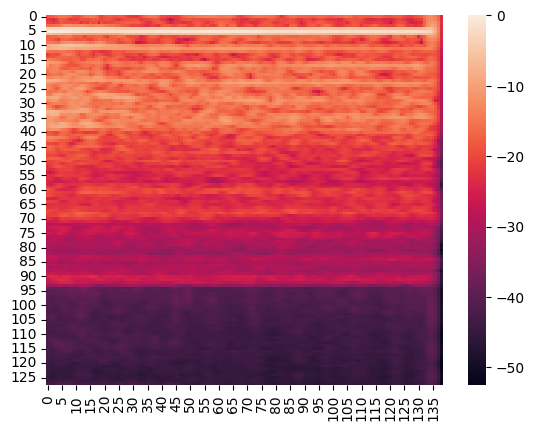

In [ ]:
sns.heatmap(a[779].reshape(a[0].shape[0],a[6].shape[1]))

In [ ]:
model1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 33600)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
len(le.classes_)

5

In [ ]:
test=model.layers[3].weights

In [ ]:
layer1=tf.keras.Sequential(layer_1)
layer2=tf.keras.Sequential(layer_2)
layer3=tf.keras.Sequential(layer_3)
layer4=tf.keras.Sequential(layer_4)

In [ ]:
x=model1.output
x=layer1(x)
x=layer2(x)
x=layer3(x)
x=layer4(x)
head_model1=x
head_model=tf.keras.layers.BatchNormalization()(head_model1)
head_model=tf.keras.layers.Dense(128,activation="relu")(head_model)
head_model=tf.keras.layers.Dropout(0.2)(head_model)
head_model=tf.keras.layers.Dense(5,activation="softmax")(head_model)
model_final=tf.keras.Model(inputs=model1.input,outputs=head_model)

In [ ]:
basemodel.trainable=False

In [ ]:
layer4.trainable=True

In [ ]:
model_final.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 33600)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 64, None, 64)      38080     
                                                                 
 sequential_1 (Sequential)   (None, 32, None, 128)     222464    
                                                                 
 sequential_2 (Sequential)   (None, 16, None, 256)     887296    
                                                                 
 sequential_3 (Sequential)   (None, None)              3542016   
                                                           

In [ ]:
b=model_final.predict(X)

139/139 [==============================] - 261s 2s/step


In [ ]:
b.shape

(4436, 512)

#Loading model

In [ ]:
model=openl3.models.load_audio_embedding_model("mel128",embedding_size=512,content_type="music")

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization_8 (Bat  (None, 128, 199, 1)       4         
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 199, 64)      640       
                                                                 
 batch_normalization_9 (Bat  (None, 128, 199, 64)      256       
 chNormalization)                                                
                                                           

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
head_model1=model.output
head_model=tf.keras.layers.BatchNormalization()(head_model1)
head_model=tf.keras.layers.Dense(128,activation="relu")(head_model)
head_model=tf.keras.layers.Dropout(0.2)(head_model)
head_model=tf.keras.layers.Dense(5,activation="softmax")(head_model)
#model_final=tf.keras.Model(inputs=model.input,outputs=[head_model,head_model1])
#
model_final=tf.keras.Model(inputs=model.input,outputs=head_model)

In [ ]:
model.trainable=False

In [ ]:
for layer in model_final.layers[-14:]:
  layer.trainable=True

In [ ]:
for layer in model_final.layers[-9:]:
  print(layer)
  layer.trainable=True

In [ ]:
model_final.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization_8 (Bat  (None, 128, 199, 1)       4         
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 199, 64)      640       
                                                                 
 batch_normalization_9 (Bat  (None, 128, 199, 64)      256       
 chNormalization)                                                
                                                           

In [ ]:
model_final.save("/content/drive/MyDrive/file2.h5")

In [ ]:
model_final.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [ ]:
X=X.reshape(-1,1,48000)

ValueError: cannot reshape array of size 89947200 into shape (1,48000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 )

In [ ]:
X_test.shape,y_test.shape

((670, 1, 33600), (670,))

In [ ]:
le.classes_


array(['Adduction deficit', 'Healthy', 'Non-Organic Dysphonia',
       'Vocal Fold Inflammation', 'Vocal Fold Lesion'], dtype='<U23')

In [ ]:
[len([k for k in y_test if k==m]) for m in set(y_test)]

[112, 121, 297, 41, 99]

In [ ]:
X_train.shape,y_train.shape

((2007, 1, 33600), (2007,))

In [ ]:
model_final.load_weights("/content/drive/MyDrive/file1.h5")

In [ ]:
X_train

array([[[-2819., -3021., -2775., ...,     0.,     0.,     0.]],

       [[ 4391.,  4744.,  5073., ...,     0.,     0.,     0.]],

       [[-2175., -2339., -2177., ...,   872.,   928.,   926.]],

       ...,

       [[   54.,   198.,   280., ...,     0.,     0.,     0.]],

       [[ 5646.,  5789.,  4976., ...,  6231.,  6264.,  6316.]],

       [[ 6151.,  6084.,  6024., ...,   429.,   857.,  1365.]]],
      dtype=float32)

In [ ]:
X_test

array([[[-2989., -3600., -3903., ..., -1285., -1188., -1083.]],

       [[  577., -1577., -2393., ..., 12751., 11665., 10029.]],

       [[-1800., -1866., -1796., ...,     0.,     0.,     0.]],

       ...,

       [[ 4539.,  4854.,  5171., ...,     0.,     0.,     0.]],

       [[ 8004.,  9792., 10580., ..., -1585.,  -800.,  -117.]],

       [[  -23.,   318.,   606., ..., -5436., -5133., -4932.]]],
      dtype=float32)

In [ ]:
y_train

array([3, 3, 1, ..., 2, 1, 2])

In [ ]:
y_test

array([4, 1, 1, 0, 1, 2, 1, 2, 1, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 4, 4, 2, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 1, 2, 4, 2, 2, 2, 0,
       2, 2, 1, 1, 4, 2, 1, 1, 0, 2, 1, 4, 4, 0, 2, 1, 2, 2, 1, 2, 2, 0,
       4, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 3, 4, 1, 0, 0, 1, 2, 2, 1,
       4, 0, 0, 1, 1, 4, 2, 2, 1, 1, 2, 1, 2, 4, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 3, 0, 2, 3, 1, 1, 0, 2, 1, 2, 1, 2, 1, 3, 1, 2,
       0, 3, 2, 4, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 3, 4, 1, 4, 1, 4, 4, 4,
       1, 1, 2, 3, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 3, 3, 0, 2, 1, 1,
       4, 4, 1, 1, 4, 2, 2, 0, 0, 2, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1,
       0, 1, 3, 1, 1, 4, 0, 3, 2, 1, 1, 1, 1, 0, 1, 0, 4, 1, 0, 2, 1, 2,
       2, 1, 1, 3, 2, 1, 4, 0, 1, 0, 3, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 2, 4, 2, 0, 2, 1, 0, 4, 2, 4, 1, 1, 2, 2, 1, 2, 1, 1, 0,
       0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 3, 0, 2, 4, 2, 0, 1, 1,
       2, 1, 4, 2, 2, 2, 1, 1, 1, 2, 1, 4, 2, 2, 2,

In [ ]:
history=model_final.fit(X_train,y_train,batch_size=128,epochs=70,validation_data=[X_test,y_test])


Epoch 1/70
16/16 [==============================] - 30s 877ms/step - loss: 0.6771 - Accuracy: 0.8137 - val_loss: 8.8484 - val_Accuracy: 0.2537
Epoch 2/70
16/16 [==============================] - 3s 220ms/step - loss: 0.4007 - Accuracy: 0.8814 - val_loss: 4.6916 - val_Accuracy: 0.4463
Epoch 3/70
16/16 [==============================] - 3s 220ms/step - loss: 0.2717 - Accuracy: 0.9058 - val_loss: 12.9614 - val_Accuracy: 0.4433
Epoch 4/70
16/16 [==============================] - 3s 220ms/step - loss: 0.2193 - Accuracy: 0.9312 - val_loss: 10.2297 - val_Accuracy: 0.4522
Epoch 5/70
16/16 [==============================] - 3s 219ms/step - loss: 0.1752 - Accuracy: 0.9507 - val_loss: 3.5640 - val_Accuracy: 0.4687
Epoch 6/70
16/16 [==============================] - 3s 219ms/step - loss: 0.1496 - Accuracy: 0.9552 - val_loss: 8.1063 - val_Accuracy: 0.4881
Epoch 7/70
16/16 [==============================] - 3s 219ms/step - loss: 0.1514 - Accuracy: 0.9571 - val_loss: 5.2562 - val_Accuracy: 0.5164
Epo

KeyboardInterrupt: 

In [ ]:
history1=model_final.fit(X_train,y_train,batch_size=128,epochs=70,validation_data=[X_test,y_test])

In [ ]:
model_final.evaluate(X_test,y_test)

27/27 [==============================] - 1s 36ms/step - loss: 1.1003 - Accuracy: 0.8026


[1.1003286838531494, 0.8026004433631897]

In [ ]:
embedding=tf.keras.Model(model.input,model_final.layers[-5].output)


In [ ]:
a=embedding.predict(X_train)

80/80 [==============================] - 5s 57ms/step


In [ ]:
model_final.evaluate(X_test,y_test)

28/28 [==============================] - 1s 19ms/step - loss: 1.5212 - accuracy: 0.7298


[1.52118980884552, 0.7297921180725098]

In [ ]:
model_final.evaluate(X_test,y_test)

28/28 [==============================] - 1s 20ms/step - loss: 1.7018 - accuracy: 0.7436


[1.7017924785614014, 0.7436489462852478]

In [ ]:
model_final.evaluate(X_test,y_test)

28/28 [==============================] - 1s 19ms/step - loss: 1.6502 - accuracy: 0.7737


[1.6502430438995361, 0.7736720442771912]

In [ ]:
a=model_final.predict(X_train)

57/57 [==============================] - 4s 66ms/step


In [ ]:
a[0].shape

(512,)

In [ ]:
a[1].shape

(512,)

In [ ]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
model_final.evaluate(X,y)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
a[1]

array([[46.59493 , 32.460686, 43.571545, ..., 18.95051 , 23.178644,
        43.132977],
       [23.55487 , 54.977936, 65.116135, ..., 34.48593 , 10.371647,
        39.480034],
       [32.64483 , 50.04492 , 56.354836, ..., 32.399853, 17.725018,
        40.92674 ],
       ...,
       [45.276054, 29.641655, 53.671   , ..., 18.551056, 15.807053,
        24.143658],
       [37.865025, 62.548252, 45.332344, ..., 15.657265, 23.125725,
        29.38499 ],
       [35.160057, 45.22291 , 50.357273, ..., 19.10951 , 27.041695,
        42.765392]], dtype=float32)

In [ ]:
np.array(y_test).reshape(-1,1)

array([[4],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [4],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [4],
       [4],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [4],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [4],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [1],
       [4],
       [2],
       [1],
       [1],
       [0],
       [2],
       [1],
       [4],
       [4],
       [0],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [4],
       [1],
       [2],
       [2],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [3],
       [4],
       [1],
       [0],
    

In [ ]:
q= ["label"]
q.extend([f"feature{i}" for i in range(1,513)])
d=pd.DataFrame(np.column_stack([np.array(y_train).reshape(-1,1),a]),columns=q)

In [ ]:
d.to_csv("/content/drive/MyDrive/SVD_newCats_train.csv")

In [ ]:
model.load_weights("file2.h5")

ValueError: Layer count mismatch when loading weights from file. Model expected 16 layers, found 19 saved layers.